### **Demonstração do uso básico do Tensorflow no processo de treinamento e teste de um sistema capaz de reconhecer caracteres numéricos.**
Nesta atividade, exploramos o treinamento de um modelo de reconhecimento de caracteres numéricos usando a biblioteca TensorFlow. O objetivo principal é demonstrar como treinar e avaliar o desempenho do modelo, bem como visualizar o progresso do treinamento por meio de gráficos gerados com a biblioteca Matplotlib.


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3754 - accuracy: 0.8898
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1970 - accuracy: 0.9423
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1601 - accuracy: 0.9515
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1378 - accuracy: 0.9584
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1237 - accuracy: 0.9623
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1117 - accuracy: 0.9653
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1040 - accuracy: 0.9673
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0974 - accuracy: 0.9691
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0913 - accuracy: 0.9707
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.086

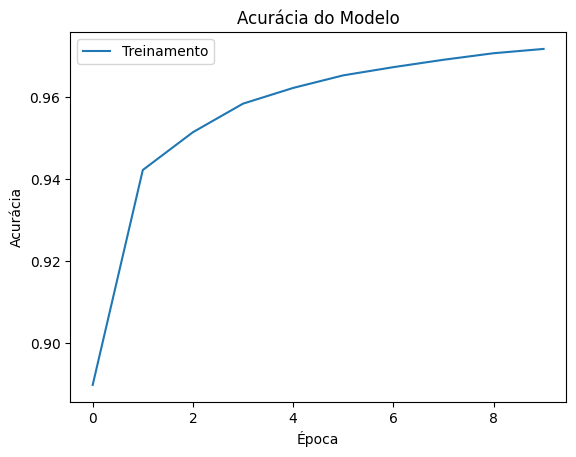

<function matplotlib.pyplot.show(close=None, block=None)>

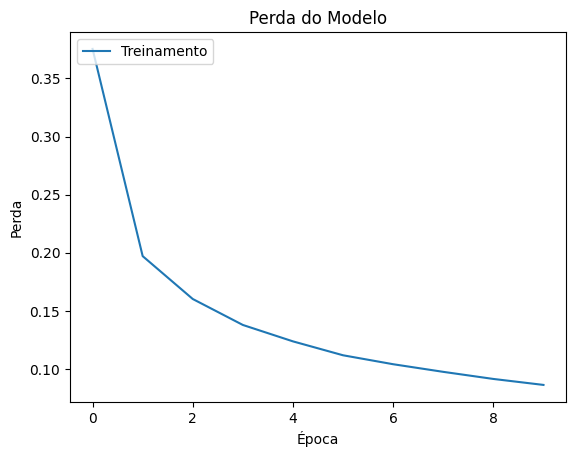

In [ ]:
#Importando o Tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt

#Carregando o Dataset mnist - 60 mil figuras 28x28 pixels
mnist = tf.keras.datasets.mnist

# Carregar os dados de treino e teste
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Fazer a Normalização dos dados (figuras) - (0-255) -> (0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Criando um modelo de rede neural que será utilizado no Tensorflow
model = tf.keras.models.Sequential([
    # Entrada tem que ser transformada de figuras 28x28 em um vetor
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 2ª Camada oculta com N neurônios utilizando a função de ativação ReLU
    tf.keras.layers.Dense(units=64, activation=tf.nn.relu),
    # 3ª Camada oculta em X% dos neurônios ativados aleatoriamente
    tf.keras.layers.Dropout(0.2),
    # Camada de saída - como são números de 0 a 9 serão 10 saídas
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax),
])

# Definindo parâmetros do modelo - algoritmo de treinamento, função de perda e a métrica de treinamento
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Treinando a rede e gravando o histórico na variável "history"
history = model.fit(x_train, y_train, epochs=10)

# Avaliar a acurácia da rede no conjunto de teste
model.evaluate(x_test, y_test, verbose=2)

# Plot das figuras com acurácia e perda
plt.plot(history.history['accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento'], loc='upper left')
plt.show